# Import

In [54]:
import pandas as pd
import seaborn as sns
import string
from nltk.corpus import stopwords
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/heloise/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/heloise/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/heloise/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/heloise/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Dataset

In [2]:
train = pd.read_csv('train.tsv', sep='\t')
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
test = pd.read_csv ('test.tsv', sep= '\t')
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


# Exploration

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
train.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66291 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [7]:
test.describe()

,PhraseId,SentenceId
count,66292.00000,66292.000000
mean,189206.50000,10114.909144
std,19136.99636,966.787807
min,156061.00000,8545.000000
25%,172633.75000,9266.000000
50%,189206.50000,10086.000000
75%,205779.25000,10941.000000
max,222352.00000,11855.000000


# EDA

/tmp/ipykernel_31241/321490812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Sentiment', palette='Blues');


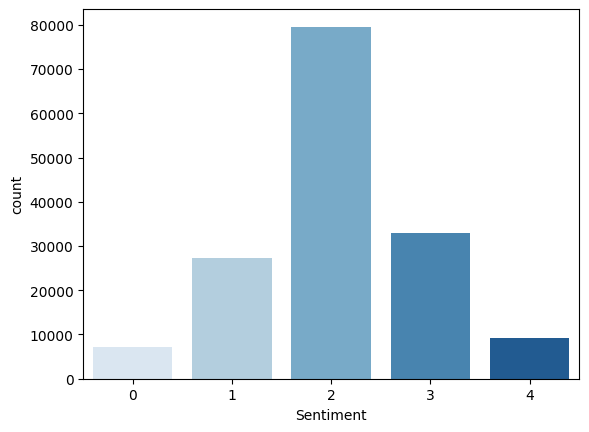

In [8]:
sns.countplot(data=train, x='Sentiment', palette='Blues');

# Nettoyage initial

In [9]:
def initial_cleaning(text):
    # Suppression des caractères spéciaux (hors lettres)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Suppression des espaces blancs supplémentaires
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Conversion en minuscules
    text = text.lower()
    
    # Suppression de la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text

# Stopwords

In [10]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()  # Le texte est déjà tokenisé par les espaces
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [11]:
# Appliquer le nettoyage initial à la colonne 'Phrase'
train['cleaned_phrase'] = train['Phrase'].apply(initial_cleaning)

# Appliquer la suppression des stop words à la colonne 'cleaned_phrase'
train['cleaned_phrase'] = train['cleaned_phrase'].apply(remove_stopwords)

# Afficher les résultats
train.head()

,PhraseId,SentenceId,Phrase,Sentiment,cleaned_phrase
0,1,1,A series of escapades demonstrating the adage ...,1,series escapades demonstrating adage good goos...
1,2,1,A series of escapades demonstrating the adage ...,2,series escapades demonstrating adage good goose
2,3,1,A series,2,series
3,4,1,A,2,
4,5,1,series,2,series


# Tokenization

In [13]:
def tokenize_text(text):
    # Tokenisation basée sur les espaces et gestion de la tokenisation de manière plus robuste
    tokens = word_tokenize(text)
    return tokens

In [15]:
def tokenize_space(text):
    # Tokenisation basée sur les espaces
    tokens = text.split()
    return tokens

In [16]:
def tokenize_regex(text):
    # Tokenisation basée sur les expressions régulières
    # Ici, on capture des séquences de lettres (mots) et des nombres
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

In [17]:


def tokenize_linguistic(text):
    # Tokenisation basée sur les règles linguistiques
    tokens = word_tokenize(text)
    return tokens

In [14]:
# Appliquer la tokenisation à la colonne 'cleaned_phrase'
train['tokens'] = train['cleaned_phrase'].apply(tokenize_text)

# Afficher les résultats
train.head()

,PhraseId,SentenceId,Phrase,Sentiment,cleaned_phrase,tokens
0,1,1,A series of escapades demonstrating the adage ...,1,series escapades demonstrating adage good goos...,"[series, escapades, demonstrating, adage, good..."
1,2,1,A series of escapades demonstrating the adage ...,2,series escapades demonstrating adage good goose,"[series, escapades, demonstrating, adage, good..."
2,3,1,A series,2,series,[series]
3,4,1,A,2,,[]
4,5,1,series,2,series,[series]


In [19]:
train['tokens_space'] = train['cleaned_phrase'].apply(tokenize_space)
train['tokens_regex'] = train['cleaned_phrase'].apply(tokenize_regex)
train['tokens_linguistic'] = train['cleaned_phrase'].apply(tokenize_linguistic)

# Afficher les résultats pour vérifier la tokenisation
train.head()

,PhraseId,SentenceId,Phrase,Sentiment,cleaned_phrase,tokens,tokens_space,tokens_regex,tokens_linguistic
0,1,1,A series of escapades demonstrating the adage ...,1,series escapades demonstrating adage good goos...,"[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good..."
1,2,1,A series of escapades demonstrating the adage ...,2,series escapades demonstrating adage good goose,"[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good..."
2,3,1,A series,2,series,[series],[series],[series],[series]
3,4,1,A,2,,[],[],[],[]
4,5,1,series,2,series,[series],[series],[series],[series]


# Stemmatisation

In [22]:
# Fonction de stemming
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Appliquer le stemming aux tokens
train['stemmed_text'] = train['tokens'].apply(stem_tokens)

In [23]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment,cleaned_phrase,tokens,tokens_space,tokens_regex,tokens_linguistic,stemmed_text
0,1,1,A series of escapades demonstrating the adage ...,1,series escapades demonstrating adage good goos...,"[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[seri, escapad, demonstr, adag, good, goos, al..."
1,2,1,A series of escapades demonstrating the adage ...,2,series escapades demonstrating adage good goose,"[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[seri, escapad, demonstr, adag, good, goos]"
2,3,1,A series,2,series,[series],[series],[series],[series],[seri]
3,4,1,A,2,,[],[],[],[],[]
4,5,1,series,2,series,[series],[series],[series],[series],[seri]


# Lemmatisation

In [27]:
# Fonction de lemmatisation
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Appliquer la lemmatisation aux tokens
train['lemmatized_tokens'] = train['tokens'].apply(lemmatize_tokens)


In [28]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment,cleaned_phrase,tokens,tokens_space,tokens_regex,tokens_linguistic,stemmed_text,lemmatized_tokens
0,1,1,A series of escapades demonstrating the adage ...,1,series escapades demonstrating adage good goos...,"[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[seri, escapad, demonstr, adag, good, goos, al...","[series, escapade, demonstrating, adage, good,..."
1,2,1,A series of escapades demonstrating the adage ...,2,series escapades demonstrating adage good goose,"[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[series, escapades, demonstrating, adage, good...","[seri, escapad, demonstr, adag, good, goos]","[series, escapade, demonstrating, adage, good,..."
2,3,1,A series,2,series,[series],[series],[series],[series],[seri],[series]
3,4,1,A,2,,[],[],[],[],[],[]
4,5,1,series,2,series,[series],[series],[series],[series],[seri],[series]


# Fréquence

In [30]:
# Compter la fréquence des tokens
token_counts = train['lemmatized_tokens'].explode().value_counts()

# Sélectionner les 10 premiers tokens les plus fréquents
top_10_tokens = token_counts[:10]


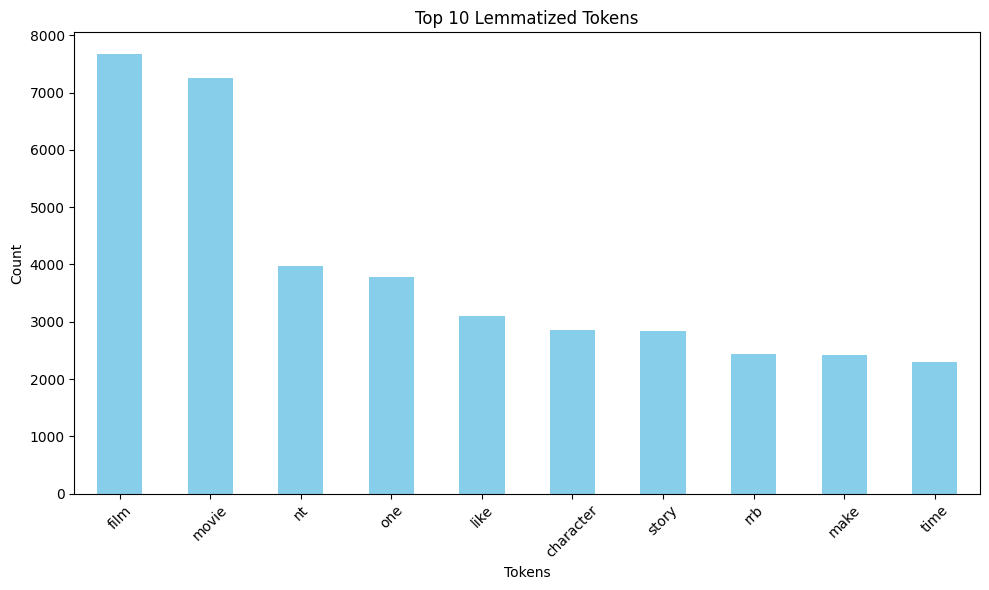

In [31]:
# Tracer un diagramme à barres des 10 tokens les plus fréquents
plt.figure(figsize=(10, 6))
top_10_tokens.plot(kind='bar', color='skyblue')
plt.title('Top 10 Lemmatized Tokens')
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


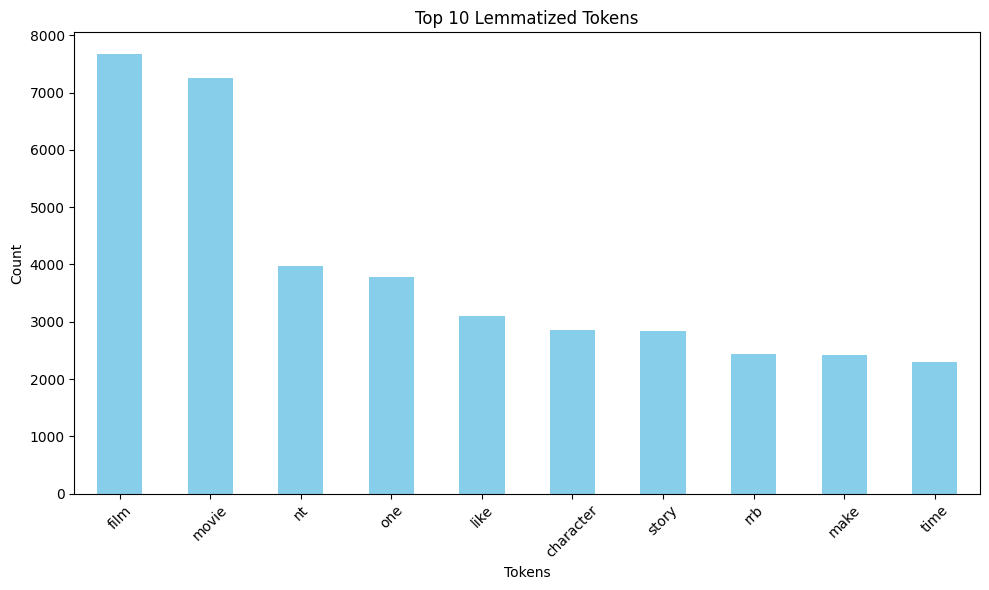

In [32]:

# Calculer la fréquence des tokens lemmatisés
token_counts = train['lemmatized_tokens'].explode().value_counts()

# Sélectionner les 10 premiers tokens les plus fréquents
top_10_tokens = token_counts[:10]

# Tracer un diagramme à barres des 10 tokens lemmatisés les plus fréquents
plt.figure(figsize=(10, 6))
top_10_tokens.plot(kind='bar', color='skyblue')
plt.title('Top 10 Lemmatized Tokens')
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

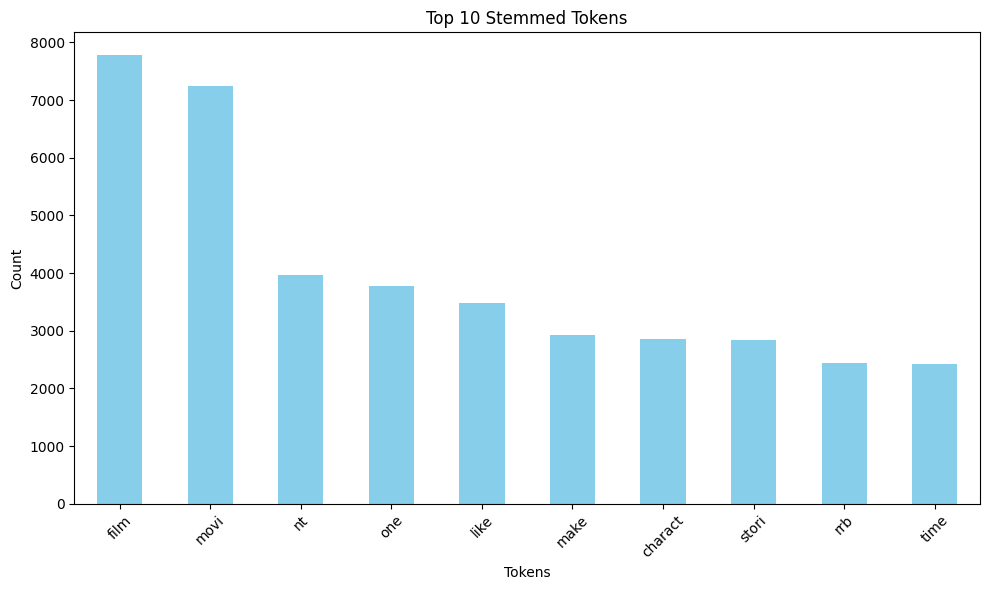

In [34]:
# Calculer la fréquence des tokens stemmatisés
token_counts = train['stemmed_text'].explode().value_counts()

# Sélectionner les 10 premiers tokens les plus fréquents
top_10_tokens = token_counts[:10]

# Tracer un diagramme à barres des 10 tokens stemmatisés les plus fréquents
plt.figure(figsize=(10, 6))
top_10_tokens.plot(kind='bar', color='skyblue')
plt.title('Top 10 Stemmed Tokens')
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bigrammes

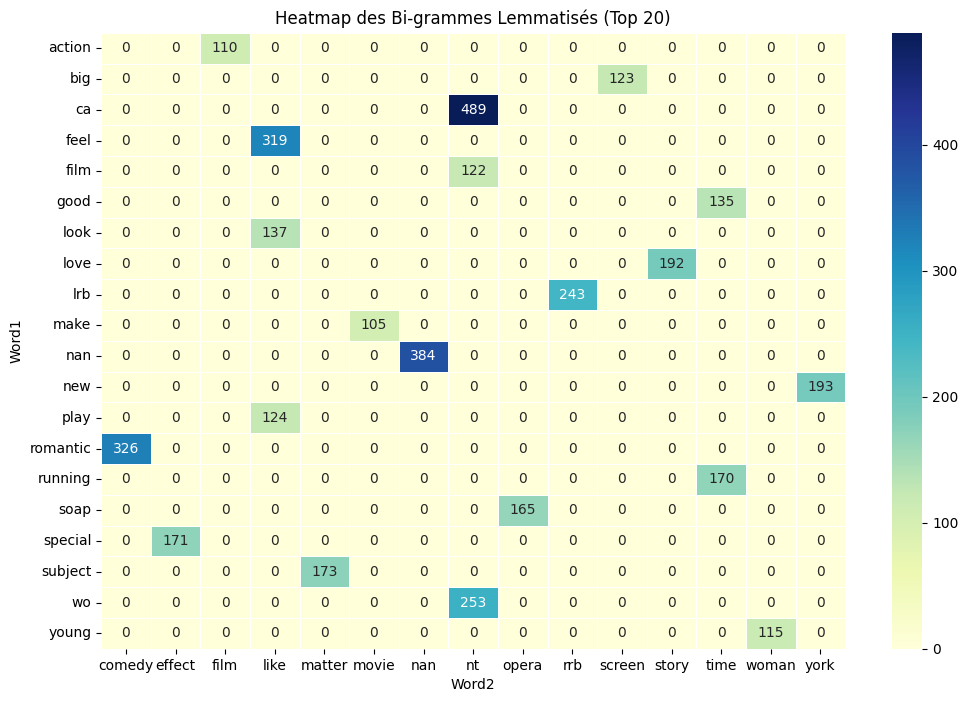

In [36]:

# Créer une liste de tous les tokens lemmatisés séparés par un espace
tokens = train['lemmatized_tokens'].explode().astype(str).tolist()

# Créer une liste de paires de mots (bi-grammes)
bigrams = [(tokens[i], tokens[i + 1]) for i in range(len(tokens) - 1)]

# Compter la fréquence des bi-grammes
bigram_counts = Counter(bigrams)

# Convertir les données en DataFrame
bigram_df = pd.DataFrame(bigram_counts.items(), columns=['Bigram', 'Count'])
bigram_df[['Word1', 'Word2']] = pd.DataFrame(bigram_df['Bigram'].tolist(), index=bigram_df.index)

# Filtrer les bigrammes les plus fréquents
top_n = 20  # Par exemple, les 20 bigrammes les plus fréquents
top_bigrams = bigram_df.nlargest(top_n, 'Count')

# Créer la pivot table
bigram_df_pivot = top_bigrams.pivot(index='Word1', columns='Word2', values='Count').fillna(0).astype(int)

# Créer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(bigram_df_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap des Bi-grammes Lemmatisés (Top 20)')
plt.xlabel('Word2')
plt.ylabel('Word1')
plt.show()

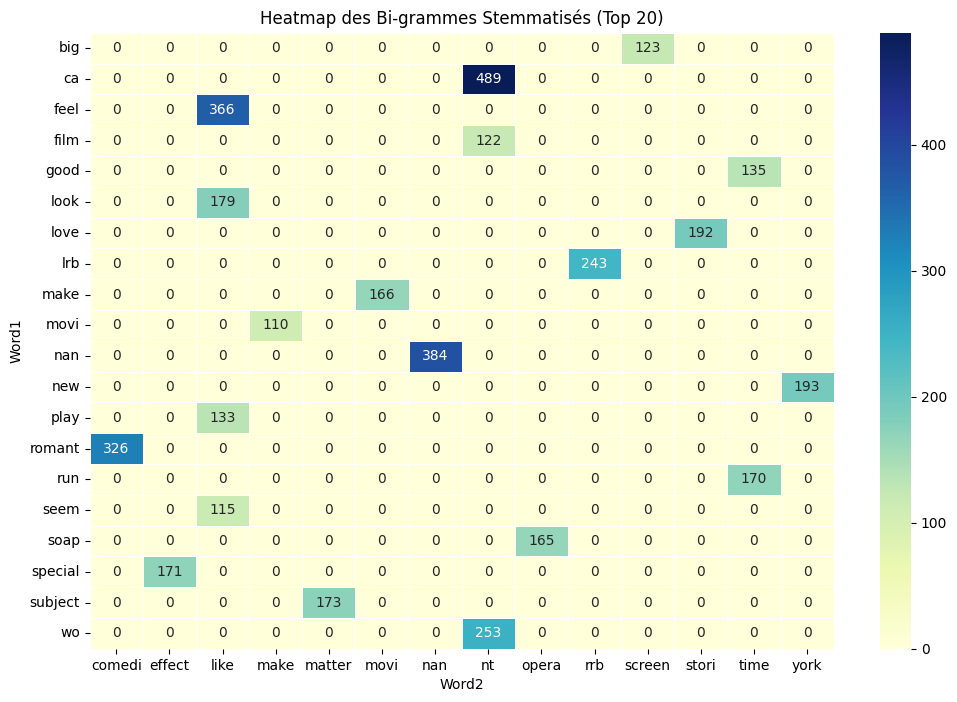

In [37]:
# Créer une liste de tous les tokens stemmatisés séparés par un espace
tokens = train['stemmed_text'].explode().astype(str).tolist()

# Créer une liste de paires de mots (bi-grammes)
bigrams = [(tokens[i], tokens[i + 1]) for i in range(len(tokens) - 1)]

# Compter la fréquence des bi-grammes
bigram_counts = Counter(bigrams)

# Convertir les données en DataFrame
bigram_df = pd.DataFrame(bigram_counts.items(), columns=['Bigram', 'Count'])
bigram_df[['Word1', 'Word2']] = pd.DataFrame(bigram_df['Bigram'].tolist(), index=bigram_df.index)

# Filtrer les bigrammes les plus fréquents
top_n = 20  # Par exemple, les 20 bigrammes les plus fréquents
top_bigrams = bigram_df.nlargest(top_n, 'Count')

# Créer la pivot table
bigram_df_pivot = top_bigrams.pivot(index='Word1', columns='Word2', values='Count').fillna(0).astype(int)

# Créer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(bigram_df_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap des Bi-grammes Stemmatisés (Top 20)')
plt.xlabel('Word2')
plt.ylabel('Word1')
plt.show()

# Trigramme

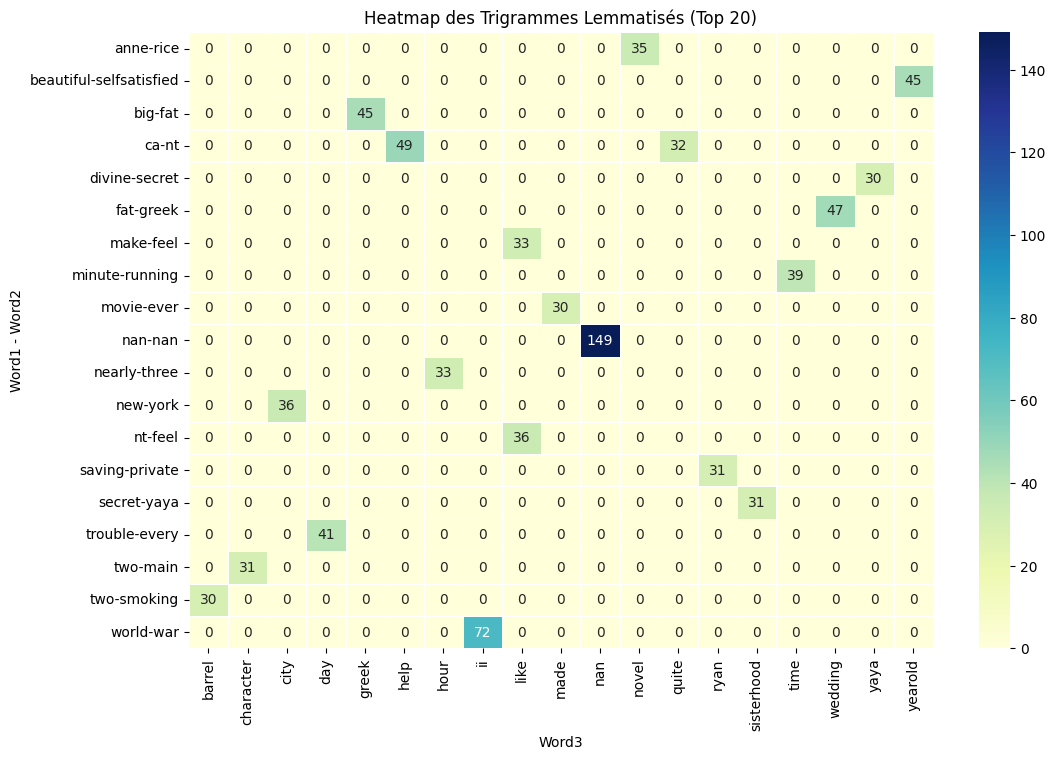

In [38]:
# Assurez-vous que les tokens sont lemmatisés et disponibles sous forme de liste
tokens = train['lemmatized_tokens'].explode().astype(str).tolist()

# Créer une liste de trigrams
trigrams = [(tokens[i], tokens[i + 1], tokens[i + 2]) for i in range(len(tokens) - 2)]

# Compter la fréquence des trigrams
trigram_counts = Counter(trigrams)

# Convertir les données en DataFrame
trigram_df = pd.DataFrame(trigram_counts.items(), columns=['Trigram', 'Count'])
trigram_df[['Word1', 'Word2', 'Word3']] = pd.DataFrame(trigram_df['Trigram'].tolist(), index=trigram_df.index)

# Filtrer les trigrams les plus fréquents
top_n = 20  # Par exemple, les 20 trigrams les plus fréquents
top_trigrams = trigram_df.nlargest(top_n, 'Count')

# Créer la pivot table pour la heatmap
trigram_df_pivot = top_trigrams.pivot(index=['Word1', 'Word2'], columns='Word3', values='Count').fillna(0).astype(int)

# Créer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(trigram_df_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap des Trigrammes Lemmatisés (Top 20)')
plt.xlabel('Word3')
plt.ylabel('Word1 - Word2')
plt.show()

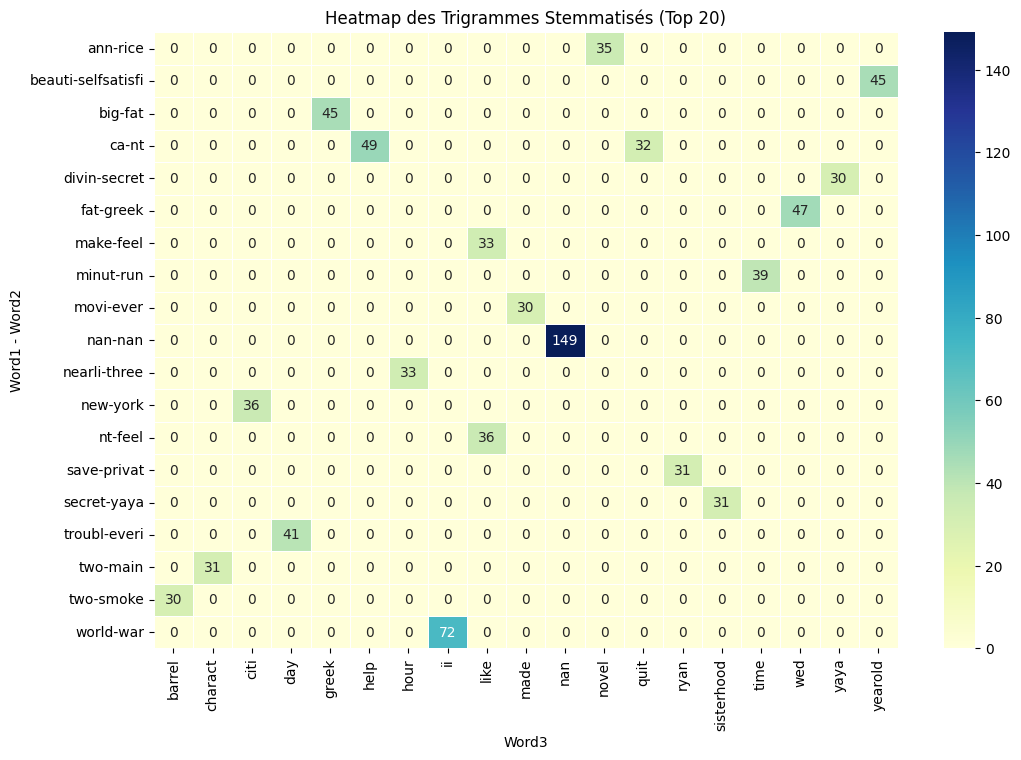

In [40]:

# Assurez-vous que les tokens sont stemmatisés et disponibles sous forme de liste
tokens = train['stemmed_text'].explode().astype(str).tolist()

# Créer une liste de trigrams
trigrams = [(tokens[i], tokens[i + 1], tokens[i + 2]) for i in range(len(tokens) - 2)]

# Compter la fréquence des trigrams
trigram_counts = Counter(trigrams)

# Convertir les données en DataFrame
trigram_df = pd.DataFrame(trigram_counts.items(), columns=['Trigram', 'Count'])
trigram_df[['Word1', 'Word2', 'Word3']] = pd.DataFrame(trigram_df['Trigram'].tolist(), index=trigram_df.index)

# Filtrer les trigrams les plus fréquents
top_n = 20  # Par exemple, les 20 trigrams les plus fréquents
top_trigrams = trigram_df.nlargest(top_n, 'Count')

# Créer la pivot table pour la heatmap
trigram_df_pivot = top_trigrams.pivot(index=['Word1', 'Word2'], columns='Word3', values='Count').fillna(0).astype(int)

# Créer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(trigram_df_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap des Trigrammes Stemmatisés (Top 20)')
plt.xlabel('Word3')
plt.ylabel('Word1 - Word2')
plt.show()

# Word cloud

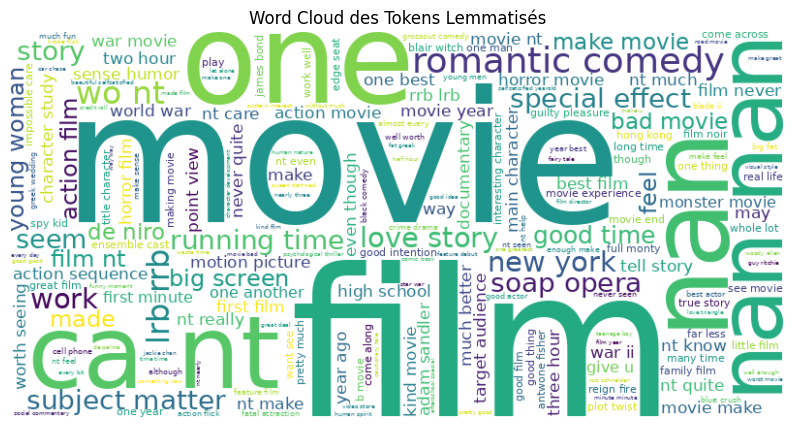

In [44]:
# Assurez-vous que les tokens lemmatisés sont disponibles sous forme de liste
text = ' '.join(train['lemmatized_tokens'].explode().astype(str))

# Définir le chemin vers la police, ou utilisez une police par défaut
font_path = 'DejaVuSans.ttf'  # Remplacez cela par le chemin de votre propre police, si nécessaire

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud des Tokens Lemmatisés')
plt.axis('off') 
plt.show()

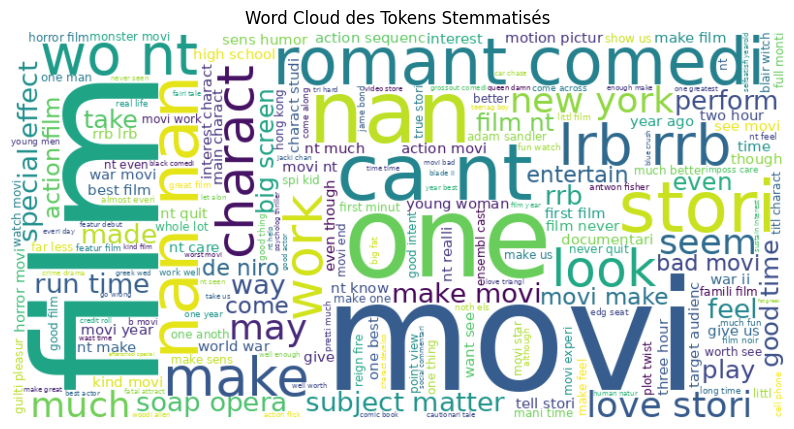

In [46]:
# Assurez-vous que les tokens sont stemmatisés et disponibles sous forme de liste
text = ' '.join(train['stemmed_text'].explode().astype(str))

# Définir le chemin vers la police, ou utilisez une police par défaut
font_path = 'DejaVuSans.ttf'  # Remplacez cela par le chemin de votre propre police, si nécessaire

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud des Tokens Stemmatisés')
plt.axis('off') 
plt.show()

# Analyse des distributions des mots des sentiments

<Figure size 1000x600 with 0 Axes>

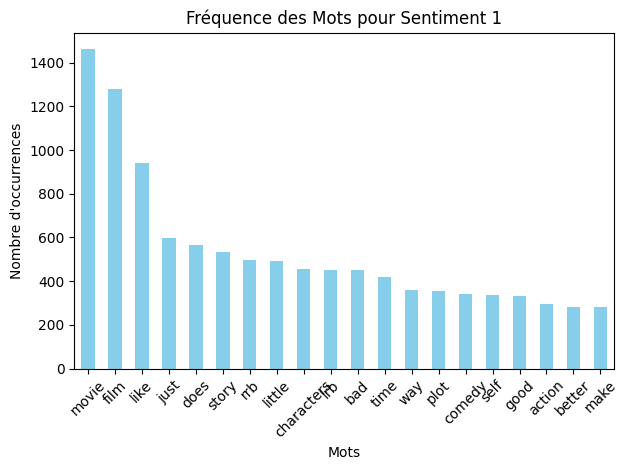

<Figure size 1000x600 with 0 Axes>

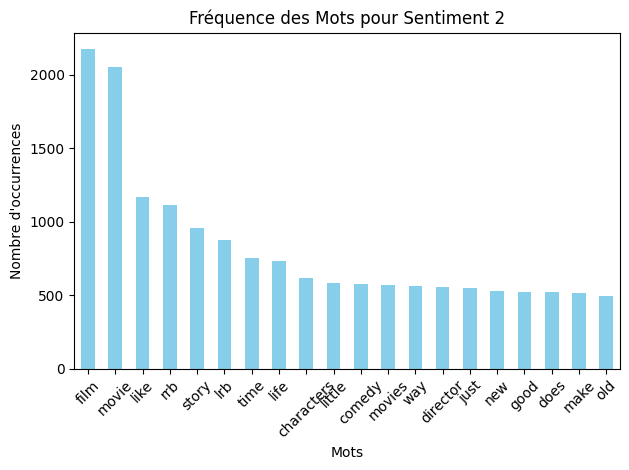

<Figure size 1000x600 with 0 Axes>

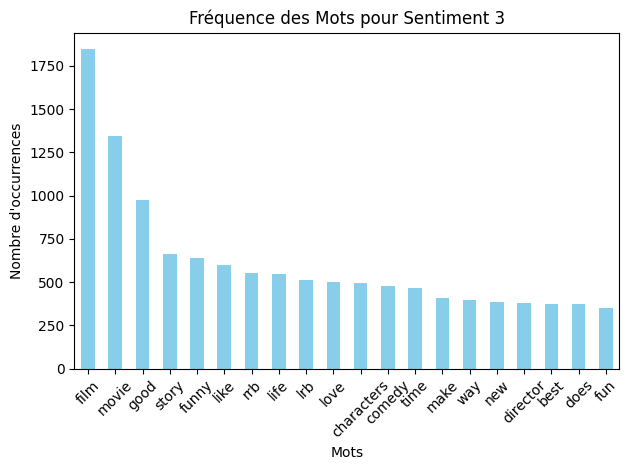

<Figure size 1000x600 with 0 Axes>

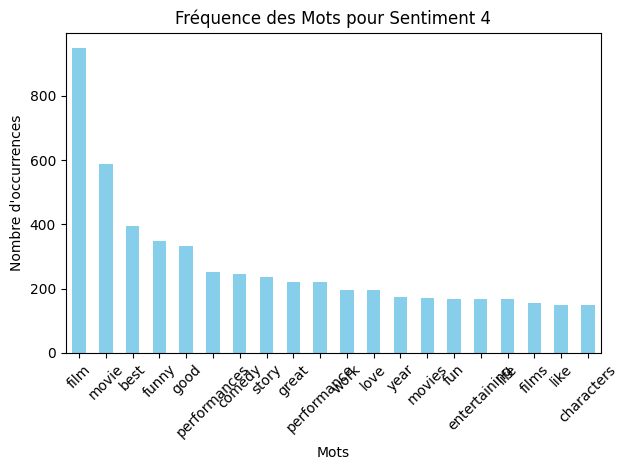

<Figure size 1000x600 with 0 Axes>

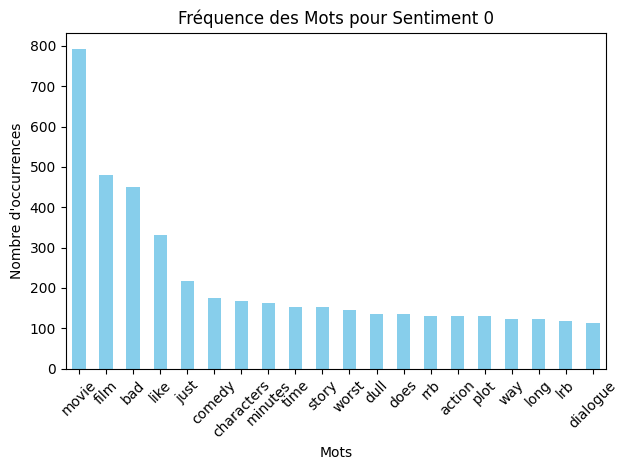

In [52]:

# Créez une fonction pour calculer la fréquence des mots pour chaque classe de sentiment
def plot_word_frequencies_by_sentiment(train):
    sentiments = train['Sentiment'].unique()
    
    for sentiment in sentiments:
        subset = train[train['Sentiment'] == sentiment]
        texts = subset['Phrase']
        
        # Créer un CountVectorizer pour extraire les mots
        vectorizer = CountVectorizer(stop_words='english')
        X = vectorizer.fit_transform(texts)
        
        # Convertir en DataFrame pour une analyse plus facile
        word_counts = X.sum(axis=0).A1
        words = vectorizer.get_feature_names_out()
        word_freq_df = pd.DataFrame({'Word': words, 'Count': word_counts})
        word_freq_df = word_freq_df.sort_values(by='Count', ascending=False)
        
        # Afficher les résultats
        plt.figure(figsize=(10, 6))
        word_freq_df.head(20).plot(kind='bar', x='Word', y='Count', legend=False, color='skyblue')
        plt.title(f'Fréquence des Mots pour Sentiment {sentiment}')
        plt.xlabel('Mots')
        plt.ylabel('Nombre d\'occurrences')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Appliquer la fonction
plot_word_frequencies_by_sentiment(train)

<Figure size 1000x600 with 0 Axes>

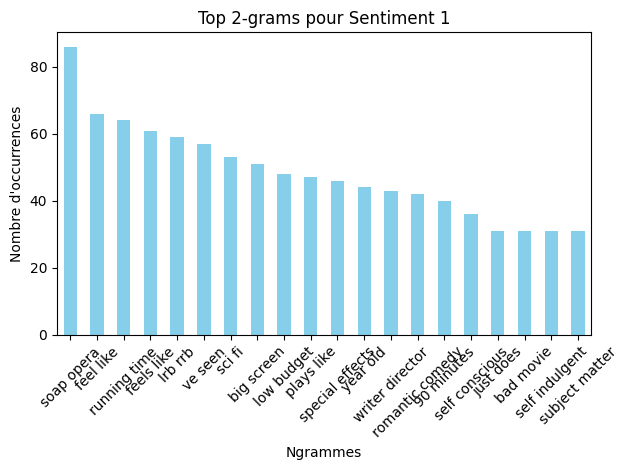

<Figure size 1000x600 with 0 Axes>

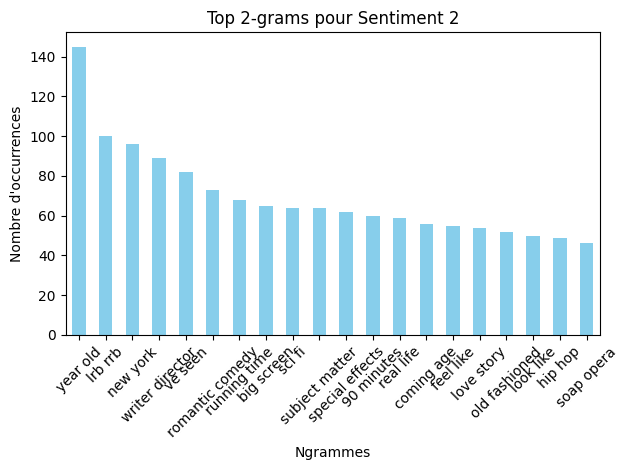

<Figure size 1000x600 with 0 Axes>

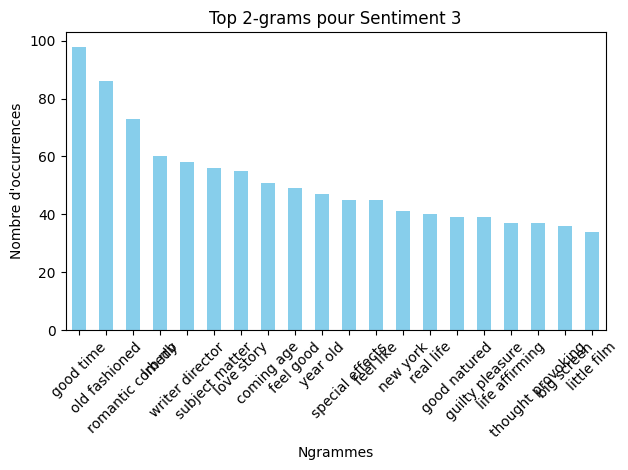

<Figure size 1000x600 with 0 Axes>

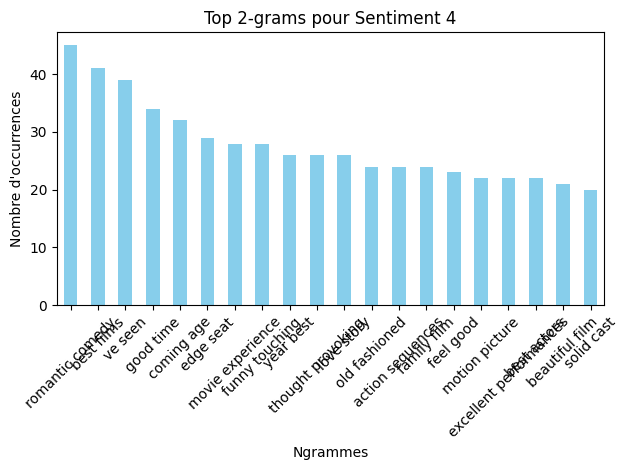

<Figure size 1000x600 with 0 Axes>

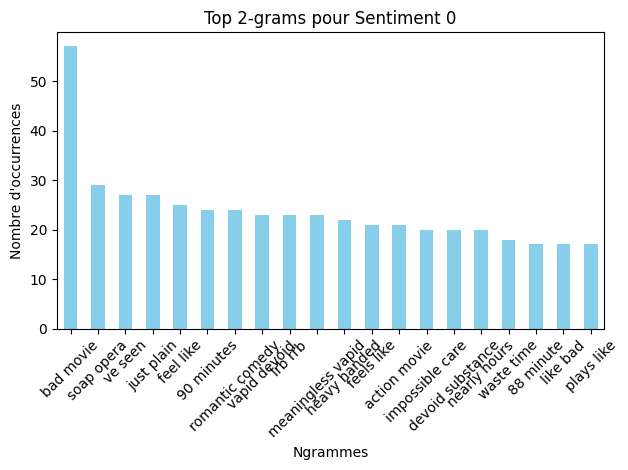

<Figure size 1000x600 with 0 Axes>

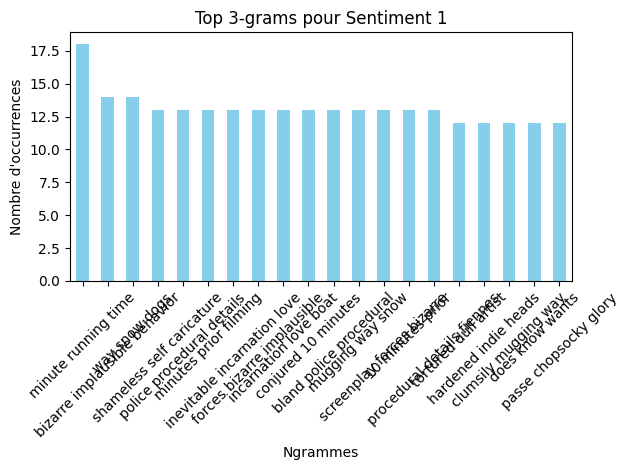

<Figure size 1000x600 with 0 Axes>

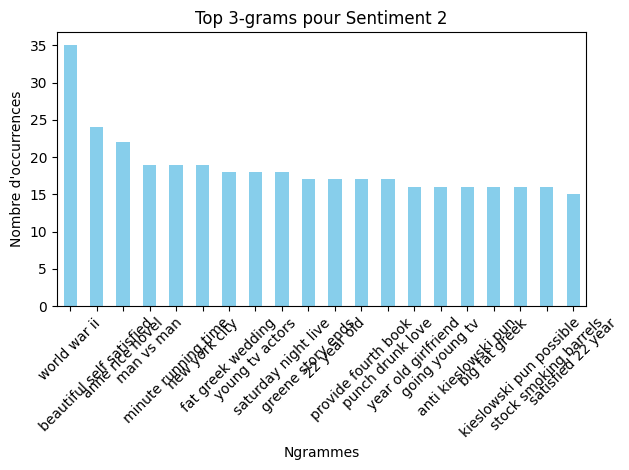

<Figure size 1000x600 with 0 Axes>

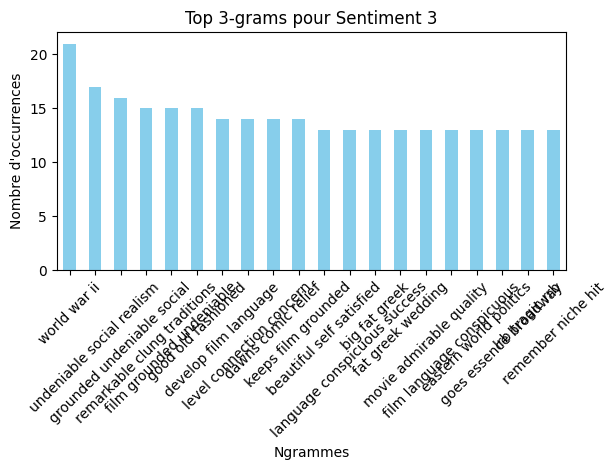

<Figure size 1000x600 with 0 Axes>

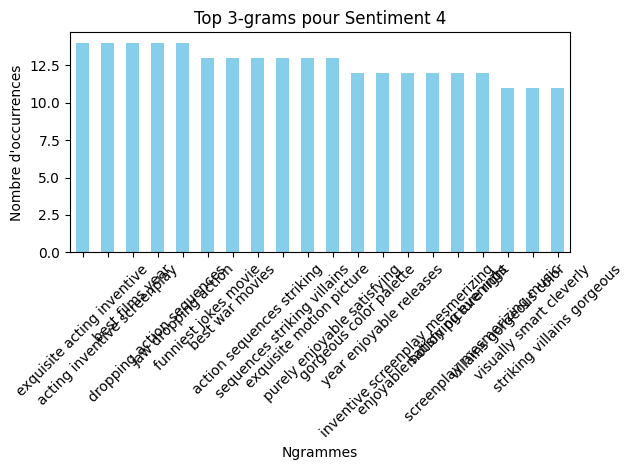

<Figure size 1000x600 with 0 Axes>

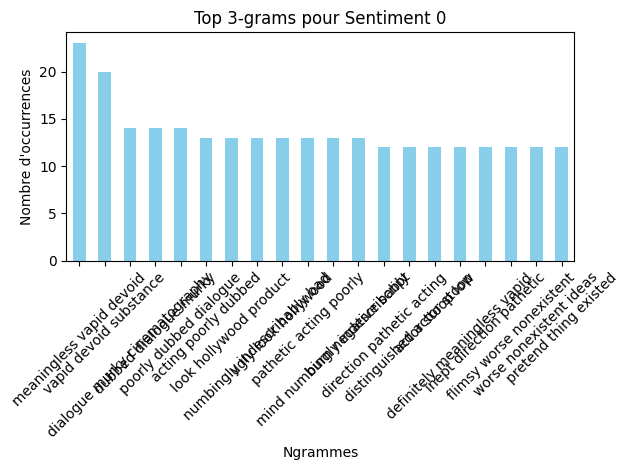

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns

def plot_ngrams(train, n=2):
    sentiments = train['Sentiment'].unique()
    
    for sentiment in sentiments:
        subset = train[train['Sentiment'] == sentiment]
        texts = subset['Phrase']
        
        # Créer un CountVectorizer pour extraire les n-grams
        vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
        X = vectorizer.fit_transform(texts)
        
        # Compter les occurrences
        ngram_counts = X.sum(axis=0).A1
        ngrams = vectorizer.get_feature_names_out()
        ngram_freq_df = pd.DataFrame({'Ngram': ngrams, 'Count': ngram_counts})
        ngram_freq_df = ngram_freq_df.sort_values(by='Count', ascending=False)
        
        # Afficher les résultats
        plt.figure(figsize=(10, 6))
        ngram_freq_df.head(20).plot(kind='bar', x='Ngram', y='Count', legend=False, color='skyblue')
        plt.title(f'Top {n}-grams pour Sentiment {sentiment}')
        plt.xlabel('Ngrammes')
        plt.ylabel('Nombre d\'occurrences')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Pour les bigrams (n=2) et trigrams (n=3)
plot_ngrams(train, n=2)
plot_ngrams(train, n=3)


<Figure size 1000x600 with 0 Axes>

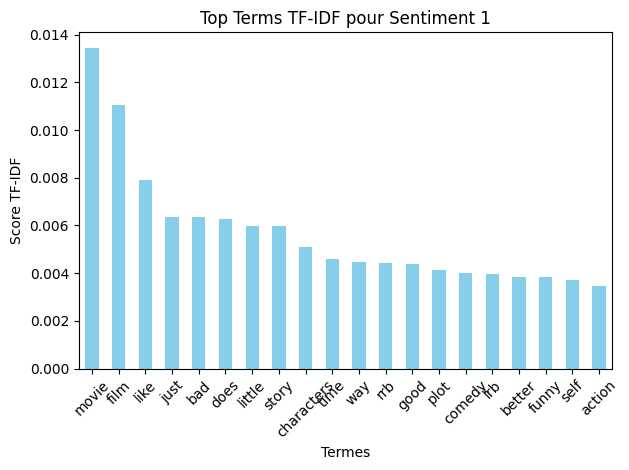

<Figure size 1000x600 with 0 Axes>

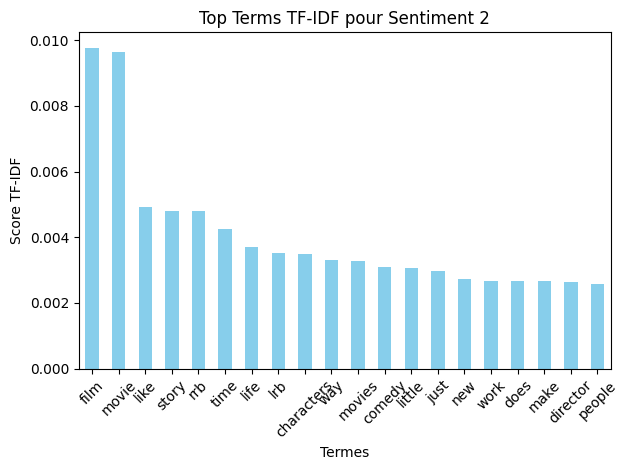

<Figure size 1000x600 with 0 Axes>

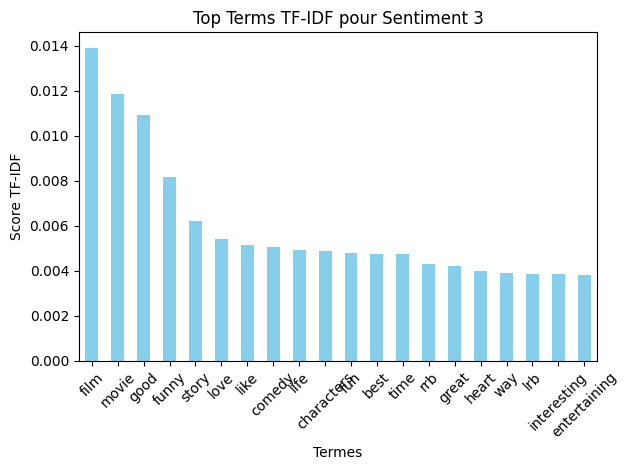

<Figure size 1000x600 with 0 Axes>

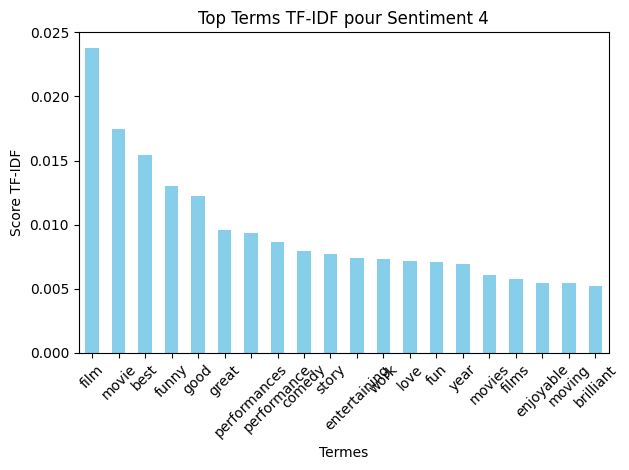

<Figure size 1000x600 with 0 Axes>

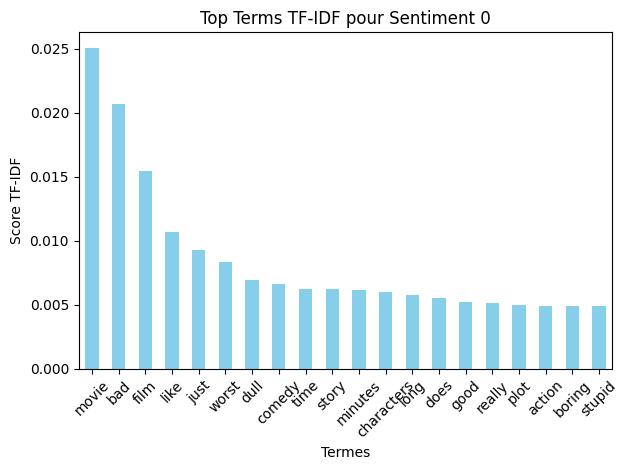

In [55]:


def plot_tfidf_by_sentiment(train):
    sentiments = train['Sentiment'].unique()
    
    for sentiment in sentiments:
        subset = train[train['Sentiment'] == sentiment]
        texts = subset['Phrase']
        
        # Créer un TfidfVectorizer
        vectorizer = TfidfVectorizer(stop_words='english')
        X = vectorizer.fit_transform(texts)
        
        # Convertir en DataFrame pour une analyse plus facile
        tfidf_scores = X.mean(axis=0).A1
        terms = vectorizer.get_feature_names_out()
        tfidf_df = pd.DataFrame({'Term': terms, 'TF-IDF': tfidf_scores})
        tfidf_df = tfidf_df.sort_values(by='TF-IDF', ascending=False)
        
        # Afficher les résultats
        plt.figure(figsize=(10, 6))
        tfidf_df.head(20).plot(kind='bar', x='Term', y='TF-IDF', legend=False, color='skyblue')
        plt.title(f'Top Terms TF-IDF pour Sentiment {sentiment}')
        plt.xlabel('Termes')
        plt.ylabel('Score TF-IDF')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Appliquer la fonction
plot_tfidf_by_sentiment(train)


# Analyse linguistique des sentiments

<Figure size 1000x600 with 0 Axes>

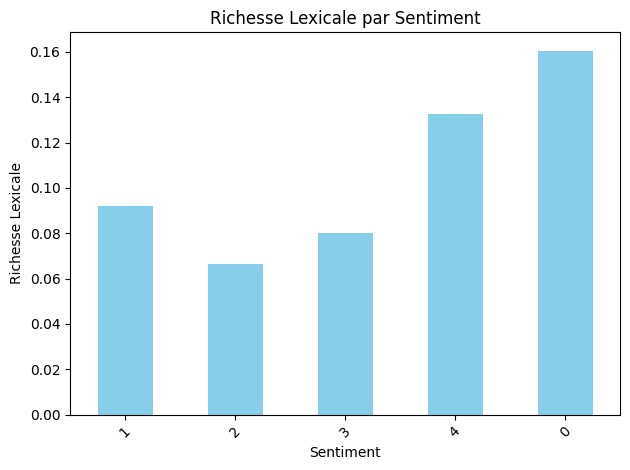

In [56]:
def lexical_richness_by_sentiment(df):
    sentiments = df['Sentiment'].unique()
    
    richness = {}
    
    for sentiment in sentiments:
        subset = df[df['Sentiment'] == sentiment]
        texts = subset['Phrase']  # Assurez-vous que cette colonne existe
        
        # Créer un CountVectorizer pour extraire les mots
        vectorizer = CountVectorizer(stop_words='english')
        X = vectorizer.fit_transform(texts)
        
        # Calculer le nombre total de mots et le nombre de mots uniques
        total_words = X.sum(axis=1).A1.sum()
        unique_words = len(vectorizer.get_feature_names_out())
        
        # Calculer la richesse lexicale
        richness[sentiment] = unique_words / total_words
    
    # Convertir en DataFrame pour affichage
    richness_df = pd.DataFrame(list(richness.items()), columns=['Sentiment', 'Lexical Richness'])
    
    # Afficher les résultats
    plt.figure(figsize=(10, 6))
    richness_df.plot(kind='bar', x='Sentiment', y='Lexical Richness', legend=False, color='skyblue')
    plt.title('Richesse Lexicale par Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Richesse Lexicale')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Appliquer la fonction
lexical_richness_by_sentiment(train)

<Figure size 1000x600 with 0 Axes>

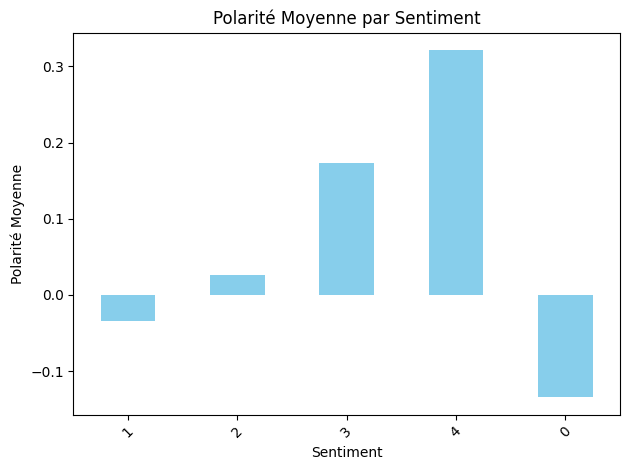

In [57]:
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity

def sentiment_polarity_analysis(df):
    sentiments = df['Sentiment'].unique()
    
    polarities = {}
    
    for sentiment in sentiments:
        subset = df[df['Sentiment'] == sentiment]
        texts = subset['Phrase']  # Assurez-vous que cette colonne existe
        
        # Calculer la polarité moyenne
        polarities[sentiment] = subset['Phrase'].apply(calculate_polarity).mean()
    
    # Convertir en DataFrame pour affichage
    polarity_df = pd.DataFrame(list(polarities.items()), columns=['Sentiment', 'Average Polarity'])
    
    # Afficher les résultats
    plt.figure(figsize=(10, 6))
    polarity_df.plot(kind='bar', x='Sentiment', y='Average Polarity', legend=False, color='skyblue')
    plt.title('Polarité Moyenne par Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Polarité Moyenne')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Appliquer la fonction
sentiment_polarity_analysis(train)

# Modèle

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string
import pandas as pd

# Charger les stopwords
stop_words = set(stopwords.words('english'))

# Définir les fonctions de prétraitement
def clean_text(text):
    # Suppression des caractères spéciaux et des chiffres
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Suppression des espaces blancs supplémentaires
    text = re.sub(r'\s+', ' ', text).strip()
    # Conversion en minuscules
    text = text.lower()
    return text

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

def stem_tokens(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

# Créer une classe pour le prétraitement personnalisé
class TextPreprocessor:
    def __init__(self, use_stemming=False):
        self.use_stemming = use_stemming
        self.lemmatizer = WordNetLemmatizer()
    
    def preprocess(self, text):
        # Nettoyage initial
        text = clean_text(text)
        # Suppression des stopwords
        text = remove_stopwords(text)
        # Tokenisation
        tokens = word_tokenize(text)
        # Stemmatisation ou Lemmatisation
        if self.use_stemming:
            tokens = stem_tokens(tokens)
        else:
            tokens = lemmatize_tokens(tokens)
        return ' '.join(tokens)

# Prétraitement des données
use_stemming = False  # Changer à True pour utiliser la stemming
preprocessor = TextPreprocessor(use_stemming=use_stemming)

# Application du prétraitement sur les données
train['processed_phrase'] = train['Phrase'].apply(preprocessor.preprocess)

# Préparer les données pour le modèle
X = train['processed_phrase']
y = train['Sentiment']

# Diviser les données en ensembles d'entraînement et de validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X, y, test_size=0.2, random_state=42
)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=5)),  # Configuration de TF-IDF
    ('clf', MultinomialNB())  # Modèle Naive Bayes
])


# Entraîner le modèle
model.fit(X_train_split, y_train_split)

# Prédire sur l'ensemble de validation
y_pred = model.predict(X_val_split)

# Évaluer le modèle
print(f'Accuracy: {accuracy_score(y_val_split, y_pred)}')
print(classification_report(y_val_split, y_pred))


Accuracy: 0.5871459694989106
              precision    recall  f1-score   support

           0       0.62      0.05      0.08      1416
           1       0.53      0.28      0.36      5527
           2       0.61      0.89      0.72     15639
           3       0.53      0.40      0.45      6707
           4       0.62      0.06      0.10      1923

    accuracy                           0.59     31212
   macro avg       0.58      0.33      0.35     31212
weighted avg       0.58      0.59      0.53     31212



In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean()}')


Cross-validation scores: [0.56391772 0.54184288 0.54418172 0.54149045 0.55696527]
Mean accuracy: 0.549679610406254
